In [1]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
import pandas as pd
import dask.dataframe as dd

In [36]:
# we need to make sure we have 0.20 for Plotting
# !conda update pandas -y
print(pd.__version__)

0.20.3


In [4]:
IMG_DIR = './analysis'
DPI=120

## Loading data using Dask (loads lazily)

In [5]:
# http://dask.pydata.org/en/latest/dataframe-overview.html
%time lazy_df = dd.read_csv('./data/2001.csv', encoding='iso-8859-1')

CPU times: user 156 ms, sys: 219 ms, total: 375 ms
Wall time: 1.21 s


In [6]:
%time len(lazy_df)

CPU times: user 22.6 s, sys: 11.8 s, total: 34.4 s
Wall time: 13.7 s


5967780

In [7]:
# http://dask.pydata.org/en/latest/dataframe-api.html#dask.dataframe.DataFrame.sample
s = 10000  # desired sample size
n = 5967780
fraction = s / n
df = lazy_df.sample(fraction)

In [8]:
%time len(df)

CPU times: user 21.2 s, sys: 8.77 s, total: 30 s
Wall time: 11 s


9999

In [9]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
437818,2001,1,31,3,NaN,2030,NaN,2159,AA,1599,...,0,0,1,NaN,0,NaN,NaN,NaN,NaN,NaN
445610,2001,1,12,5,1720.0,1723,2009.0,2005,AA,1848,...,9,13,0,NaN,0,NaN,NaN,NaN,NaN,NaN
30553,2001,1,3,3,1545.0,1550,1706.0,1713,US,1615,...,3,24,0,NaN,0,NaN,NaN,NaN,NaN,NaN
609873,2001,2,2,5,1923.0,1920,2040.0,2100,WN,787,...,10,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN
288759,2001,1,21,7,558.0,600,723.0,732,DL,1275,...,6,14,0,NaN,0,NaN,NaN,NaN,NaN,NaN


## Create numeral versions of categoricals for later analysis

In [10]:
# first turn our 10000 samples into a normal pandas df for convenience
%time df = df.compute()

CPU times: user 22.2 s, sys: 7.75 s, total: 30 s
Wall time: 10.7 s


In [11]:
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# turn those text labels into numerical
text_cols = ['UniqueCarrier', 'Origin', 'Dest']
le = preprocessing.LabelEncoder()
for c in text_cols:
    # print (c,set(df[c].values))
    flist = list(set(df[c].values))
    # print(flist)
    le.fit(flist)
    leo = le.transform(flist)
    # print (c,flist,leo)
    df[c+'_'] = df[c]
    df[c+'_'].replace(flist,value=leo,inplace=True)

In [12]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier_,Origin_,Dest_
437818,2001,1,31,3,NaN,2030,NaN,2159,AA,1599,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,147,137
445610,2001,1,12,5,1720.0,1723,2009.0,2005,AA,1848,...,NaN,0,NaN,NaN,NaN,NaN,NaN,0,60,55
30553,2001,1,3,3,1545.0,1550,1706.0,1713,US,1615,...,NaN,0,NaN,NaN,NaN,NaN,NaN,10,153,29
609873,2001,2,2,5,1923.0,1920,2040.0,2100,WN,787,...,NaN,0,NaN,NaN,NaN,NaN,NaN,11,199,154
288759,2001,1,21,7,558.0,600,723.0,732,DL,1275,...,NaN,0,NaN,NaN,NaN,NaN,NaN,4,51,187


## Reaplace NaN with -1 (we have plenty of them)

In [13]:
df.fillna(-1, inplace=True)

In [14]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier_,Origin_,Dest_
437818,2001,1,31,3,-1.0,2030,-1.0,2159,AA,1599,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,0,147,137
445610,2001,1,12,5,1720.0,1723,2009.0,2005,AA,1848,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,0,60,55
30553,2001,1,3,3,1545.0,1550,1706.0,1713,US,1615,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,10,153,29
609873,2001,2,2,5,1923.0,1920,2040.0,2100,WN,787,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,11,199,154
288759,2001,1,21,7,558.0,600,723.0,732,DL,1275,...,-1.0,0,-1.0,-1.0,-1.0,-1.0,-1.0,4,51,187


In [15]:
cols_for_correlation = [
    'DayOfWeek',
    'DepTime',
    'ArrTime',
    'ArrDelay',
    'Distance',
    'UniqueCarrier_',
    'Origin_',
    'Dest_'
]

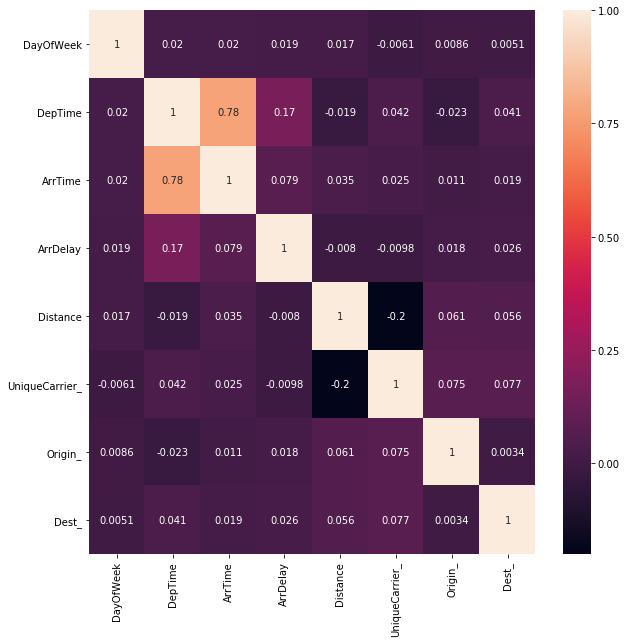

In [16]:
corrmat = df[cols_for_correlation].corr()
sns.heatmap(corrmat, annot=True)
figure = plt.gcf()
figure.set_size_inches(10, 10)
plt.show()
# plt.savefig(IMG_DIR+'/corr.png', dpi = DPI)

In [17]:
def plot(col1, col2):
    # https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.jointplot.html#seaborn.jointplot
    sns.jointplot(df[col1],df[col2],dropna=True, kind="hex")
    figure = plt.gcf()
    figure.set_size_inches(10, 10)
    # for notebook
    plt.show()
#     plt.savefig('%s/%s_%s.png'%(IMG_DIR, col1, col2), dpi = DPI)

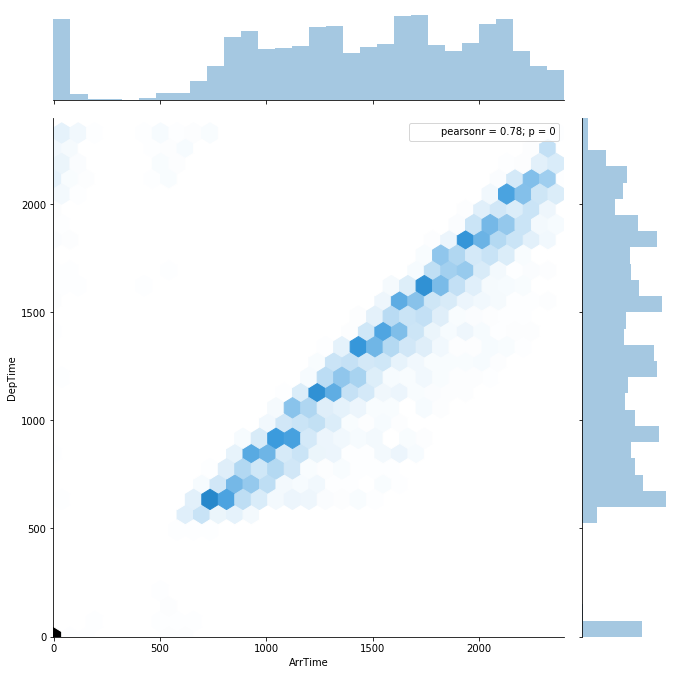

In [18]:
plot('ArrTime', 'DepTime')

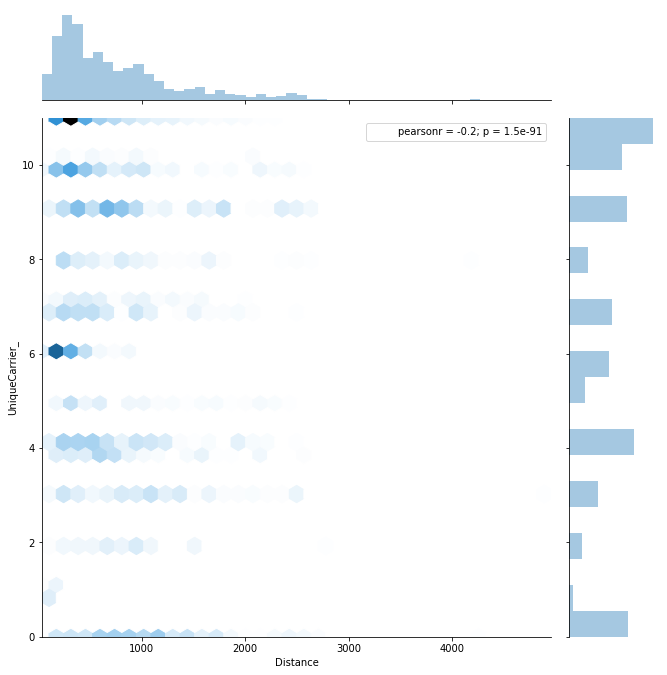

In [19]:
plot('Distance', 'UniqueCarrier_')

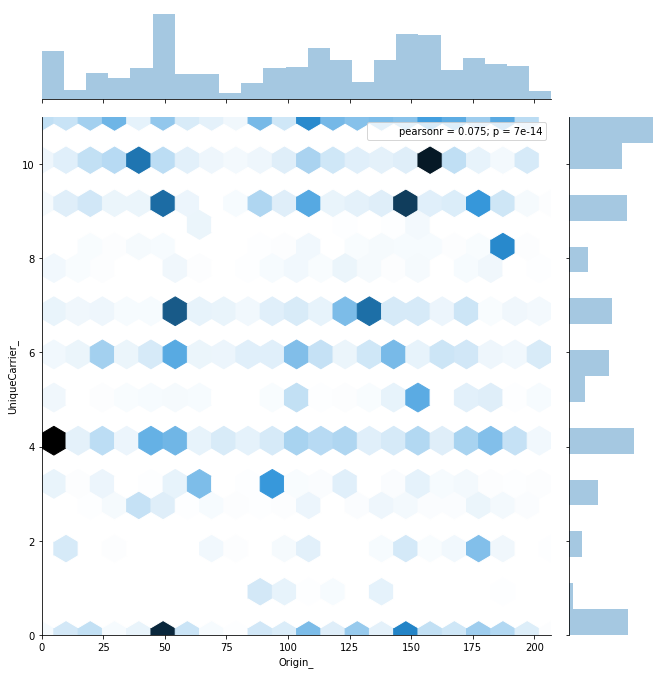

In [20]:
plot('Origin_', 'UniqueCarrier_')

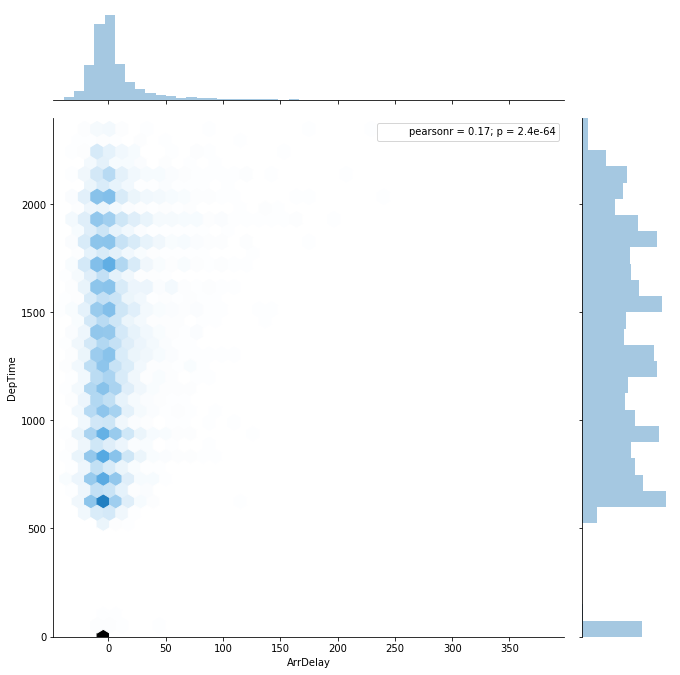

In [34]:
# not idea how to interpret this
plot('ArrDelay', 'DepTime')

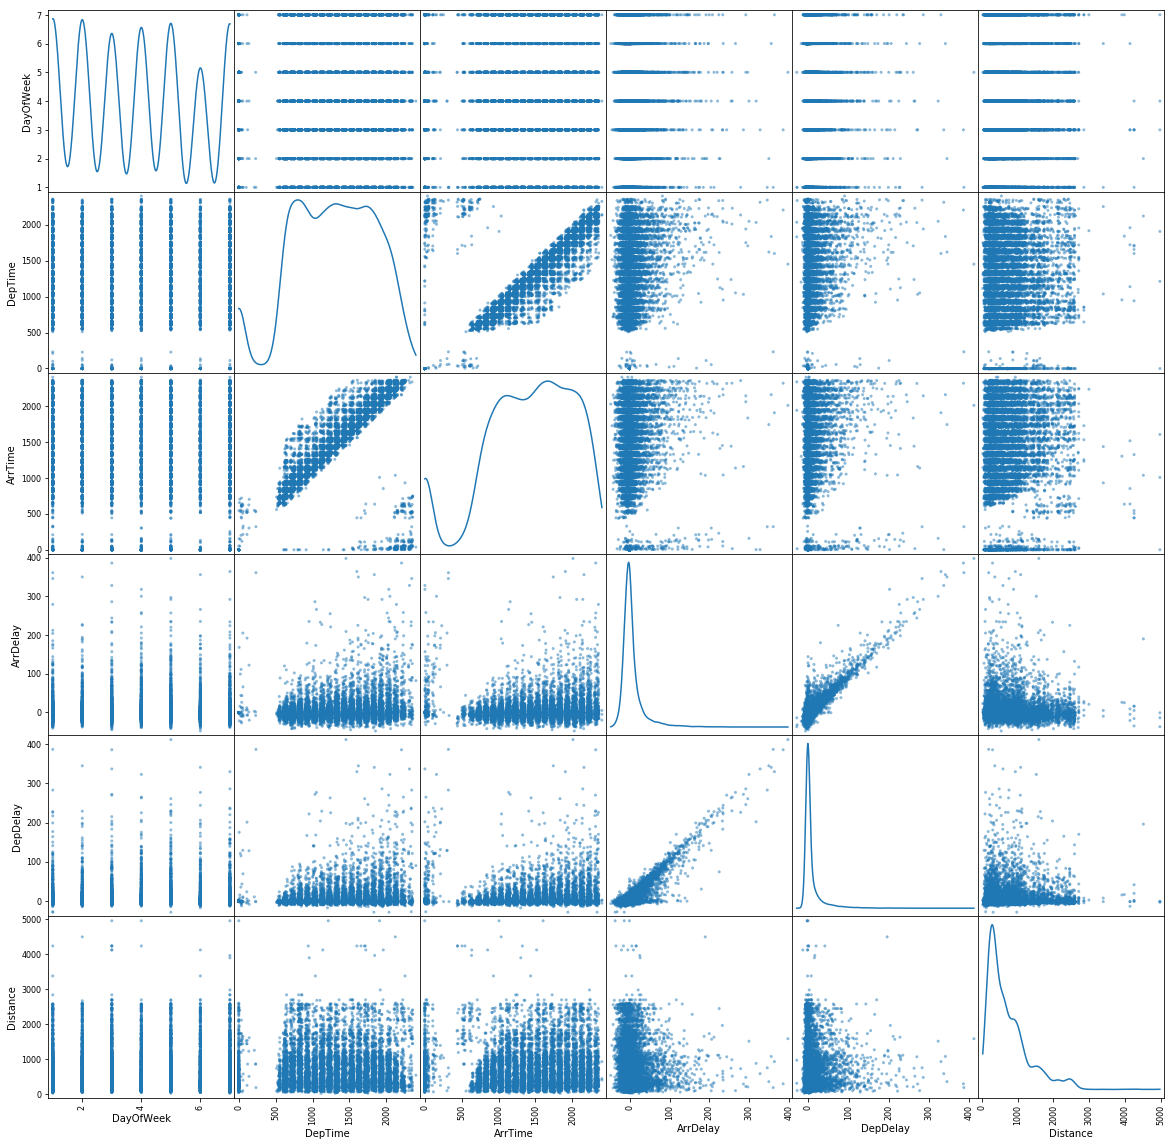

In [42]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cols_for_scatter = [
    'DayOfWeek',
    'DepTime',
    'ArrTime',
    'ArrDelay',
    'DepDelay',
    'Distance',
]
plt.clf()
plt.figure(figsize=(20, 20))

pd.plotting.scatter_matrix(df[cols_for_scatter], figsize=(20, 20), diagonal='kde')
plt.show()

## Correlation between Distance and AirTime - Linear Regression

In [43]:
distance = df['Distance']

In [50]:
airtime = df['AirTime']

Text(0,0.5,'Distance, miles')

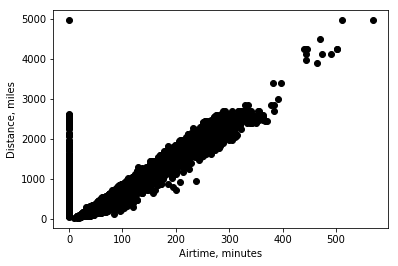

In [56]:
plt.scatter(airtime, distance,  color='black')
plt.xlabel('Airtime, minutes')
plt.ylabel('Distance, miles')

In [58]:
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model

In [63]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(airtime.reshape(-1, 1), distance.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
distance_pred = regr.predict(airtime.reshape(-1, 1))

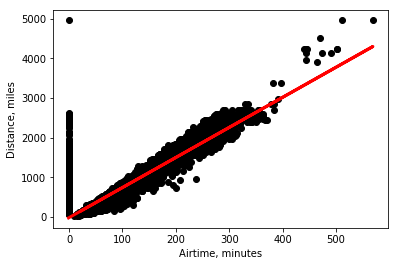

In [70]:
plt.scatter(airtime, distance,  color='black')
plt.xlabel('Airtime, minutes')
plt.ylabel('Distance, miles')
plt.plot(airtime, distance_pred, color='red', linewidth=3)

In [75]:
# approx. 440 miles / hour

regr.predict(60)

array([[ 439.78116647]])

In [79]:
# km /h (surprisingly low), maybe a lot of start and landing phases
440 * 1.60934

708.1096

## Correct some timestamps and add a composed timestamp for easy reference

In [21]:
# 2400 is not a valid time
df['CRSDepTime'] = df.apply(lambda row: 2359 if row['CRSDepTime'] == 2400 else row['CRSDepTime'],axis='columns')

In [22]:
df['@timestamp'] = df.apply(lambda row: pd.Timestamp('%s-%s-%s;%04d'%(row['Year'], row['Month'], row['DayofMonth'], row['CRSDepTime'])),axis='columns')

In [23]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier_,Origin_,Dest_,@timestamp
437818,2001,1,31,3,-1.0,2030,-1.0,2159,AA,1599,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,0,147,137,2001-01-31 20:30:00
445610,2001,1,12,5,1720.0,1723,2009.0,2005,AA,1848,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,0,60,55,2001-01-12 17:23:00
30553,2001,1,3,3,1545.0,1550,1706.0,1713,US,1615,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,10,153,29,2001-01-03 15:50:00
609873,2001,2,2,5,1923.0,1920,2040.0,2100,WN,787,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,11,199,154,2001-02-02 19:20:00
288759,2001,1,21,7,558.0,600,723.0,732,DL,1275,...,0,-1.0,-1.0,-1.0,-1.0,-1.0,4,51,187,2001-01-21 06:00:00


In [24]:
timestamps = df['@timestamp']

In [25]:
# plt.hist?

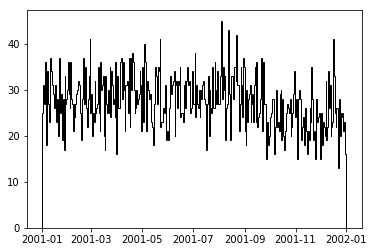

In [26]:
plt.hist(timestamps.tolist(), bins=365, histtype = 'step', color='black')
plt.show()

In [27]:
10000 / 365

27.397260273972602

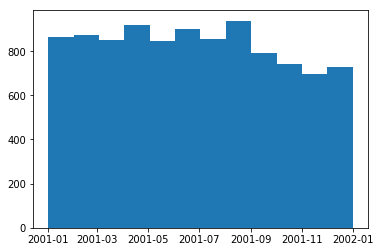

In [28]:
plt.hist(timestamps.tolist(), bins=12, histtype = 'bar')
plt.show()

## Convert fields 'cancelled' and 'diverted' to boolean

In [29]:
df['Cancelled'] = df.apply(lambda row: False if row['Cancelled'] == 0 else True, axis='columns')
df['Diverted'] = df.apply(lambda row: False if row['Diverted'] == 0 else True, axis='columns')

In [30]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,UniqueCarrier_,Origin_,Dest_,@timestamp
437818,2001,1,31,3,-1.0,2030,-1.0,2159,AA,1599,...,False,-1.0,-1.0,-1.0,-1.0,-1.0,0,147,137,2001-01-31 20:30:00
445610,2001,1,12,5,1720.0,1723,2009.0,2005,AA,1848,...,False,-1.0,-1.0,-1.0,-1.0,-1.0,0,60,55,2001-01-12 17:23:00
30553,2001,1,3,3,1545.0,1550,1706.0,1713,US,1615,...,False,-1.0,-1.0,-1.0,-1.0,-1.0,10,153,29,2001-01-03 15:50:00
609873,2001,2,2,5,1923.0,1920,2040.0,2100,WN,787,...,False,-1.0,-1.0,-1.0,-1.0,-1.0,11,199,154,2001-02-02 19:20:00
288759,2001,1,21,7,558.0,600,723.0,732,DL,1275,...,False,-1.0,-1.0,-1.0,-1.0,-1.0,4,51,187,2001-01-21 06:00:00
